In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('combined.csv')

In [3]:
df.head()

,date,county,maxtempF,mintempF,avgtempF,totalSnow,humid,wind,precip,q_avgtempF,q_avghumid,q_sumprecip,sunHour,FIRE_NAME,CAUSE,lat,long,GIS_ACRES
0,2008-07,Santa Barbara County,89.129032,59.709677,80.548387,0.0,41.451613,7.354839,0.0,72.937634,34.079570,0.010000,13.164516,no_fire,0.0,34.54,-120.04,0.000000
1,2008-07,Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,38.434409,0.068065,14.022581,SERPENTINE,1.0,38.18,-120.56,176.763400
2,2008-07,Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,38.434409,0.068065,14.022581,POOL 2 - MAIN,10.0,38.18,-120.56,73.444778
3,2008-07,Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,38.434409,0.068065,14.022581,FRENCH,14.0,38.18,-120.56,101.074150
4,2008-07,Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,38.434409,0.068065,14.022581,EVANS,6.0,38.18,-120.56,103.968050


In [4]:
# Drop unnecessary columns
df = df.drop(columns=['FIRE_NAME', 'lat', 'long'])

In [5]:
# Convert GIS_ACRES to a binary variable
df['fire_occurred'] = (df['GIS_ACRES'] > 0) * 1

In [6]:
# Extract month and year
df['date'] = [x.split('-') for x in df['date']]
df['month'] = [int(x[1]) for x in df['date']]
df['year'] = [int(x[0]) for x in df['date']]

In [7]:
# One-hot encode the month column
fire_data_encoded = pd.get_dummies(df, columns=['month'])

In [8]:
df.shape

(10988, 18)

In [9]:
fire_data_encoded.head()

,date,county,maxtempF,mintempF,avgtempF,totalSnow,humid,wind,precip,q_avgtempF,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,"[2008, 07]",Santa Barbara County,89.129032,59.709677,80.548387,0.0,41.451613,7.354839,0.0,72.937634,...,0,0,0,0,1,0,0,0,0,0
1,"[2008, 07]",Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,...,0,0,0,0,1,0,0,0,0,0
2,"[2008, 07]",Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,...,0,0,0,0,1,0,0,0,0,0
3,"[2008, 07]",Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,...,0,0,0,0,1,0,0,0,0,0
4,"[2008, 07]",Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,...,0,0,0,0,1,0,0,0,0,0


In [10]:
fire_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10988 entries, 0 to 10987
Data columns (total 29 columns):
date             10988 non-null object
county           10988 non-null object
maxtempF         10988 non-null float64
mintempF         10988 non-null float64
avgtempF         10988 non-null float64
totalSnow        10988 non-null float64
humid            10988 non-null float64
wind             10988 non-null float64
precip           10988 non-null float64
q_avgtempF       10988 non-null float64
q_avghumid       10988 non-null float64
q_sumprecip      10988 non-null float64
sunHour          10988 non-null float64
CAUSE            10988 non-null float64
GIS_ACRES        10988 non-null float64
fire_occurred    10988 non-null int32
year             10988 non-null int64
month_1          10988 non-null uint8
month_2          10988 non-null uint8
month_3          10988 non-null uint8
month_4          10988 non-null uint8
month_5          10988 non-null uint8
month_6          10988 non-

In [11]:
fire_data_encoded.head()

,date,county,maxtempF,mintempF,avgtempF,totalSnow,humid,wind,precip,q_avgtempF,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,"[2008, 07]",Santa Barbara County,89.129032,59.709677,80.548387,0.0,41.451613,7.354839,0.0,72.937634,...,0,0,0,0,1,0,0,0,0,0
1,"[2008, 07]",Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,...,0,0,0,0,1,0,0,0,0,0
2,"[2008, 07]",Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,...,0,0,0,0,1,0,0,0,0,0
3,"[2008, 07]",Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,...,0,0,0,0,1,0,0,0,0,0
4,"[2008, 07]",Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,...,0,0,0,0,1,0,0,0,0,0


 ## Exploratory Data Analysis

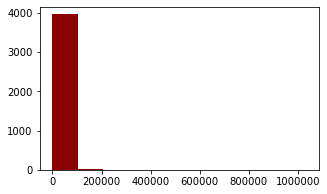

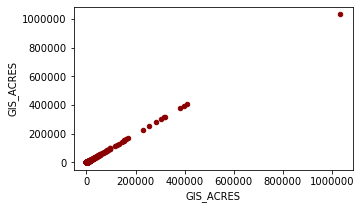

In [12]:
#distribution acreage for fire occurrences
fire_df = df[df['GIS_ACRES'] > 0]
plt.figure(figsize=(5, 3))
plt.hist(fire_df['GIS_ACRES'], color='darkred')
fire_df.plot(kind='scatter', x='GIS_ACRES', y='GIS_ACRES', color='darkred', figsize=(5, 3));

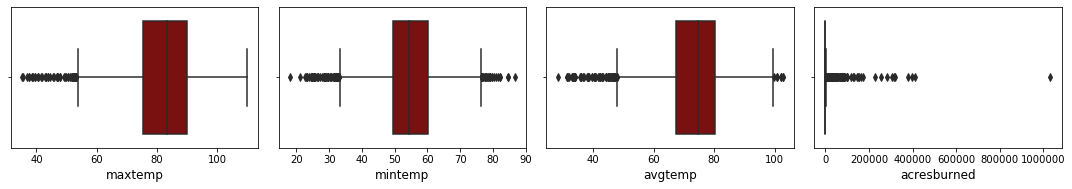

In [13]:
#boxplots for maximum temperature, minimum temperature, average temperature, and acres burned, highlighting the distribution and outliers in each variable
numeric_columns = ['maxtempF', 'mintempF', 'avgtempF', 'GIS_ACRES']
custom_labels = ['maxtemp', 'mintemp', 'avgtemp', 'acresburned']
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=fire_df[column], color='darkred')
    plt.xlabel(custom_labels[i-1], fontsize=12)  
    plt.tight_layout()
plt.show()

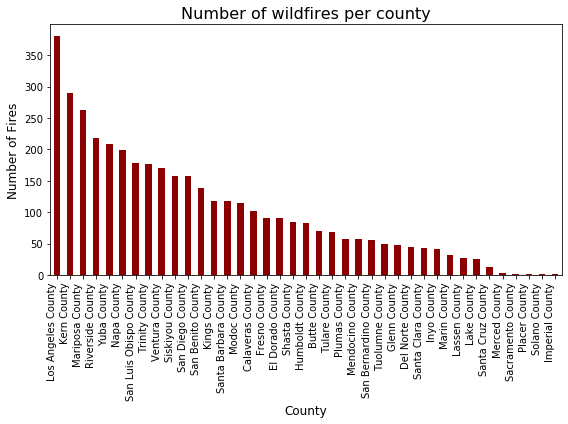

In [14]:
# number of wildfires per county
fires_per_county = fire_df['county'].value_counts()
plt.figure(figsize=(8, 6))
fires_per_county.plot(kind='bar', color='darkred')
plt.xlabel('County', fontsize=12)
plt.ylabel('Number of Fires', fontsize=12)
plt.title('Number of wildfires per county', fontsize=16)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

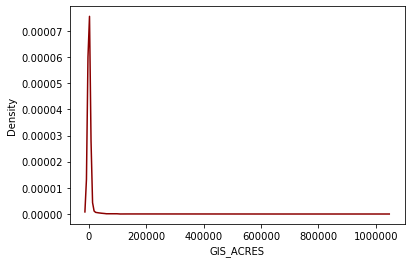

In [15]:
#distribution of fire sizes (in acres) 
plt.figure(figsize=(6, 4))
sns.distplot(fire_df['GIS_ACRES'], hist=False, color='darkred')
plt.show()

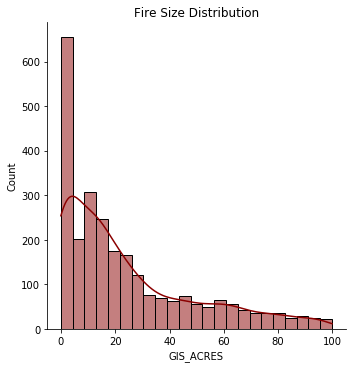

In [16]:
#distribution of fire sizes (in acres) for fires smaller than 100 acres
fig_1 = sns.displot(fire_df[fire_df['GIS_ACRES'] < 100]['GIS_ACRES'],
            kde=True, color='darkred')
fig_1.set(title="Fire Size Distribution");

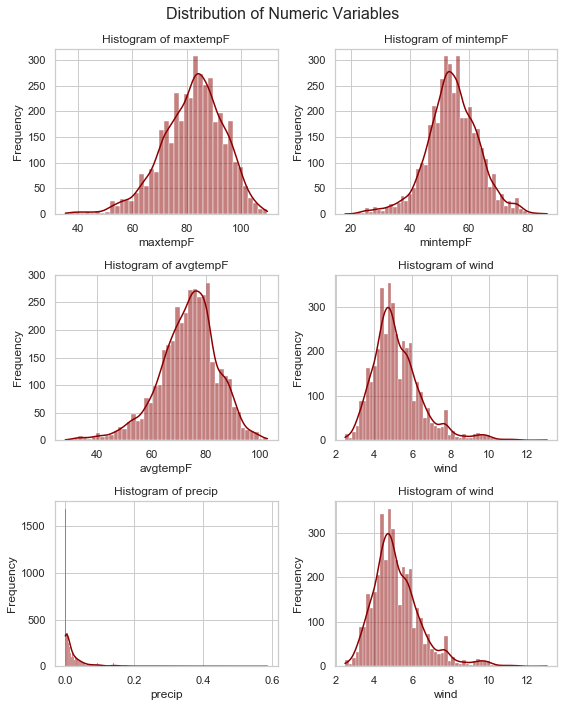

In [17]:
#distribution of numeric variables 
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(8, 10))
fig.suptitle('Distribution of Numeric Variables', fontsize=16)
numeric_columns = ['maxtempF', 'mintempF', 'avgtempF', 'wind', 'precip', 'wind']
for col, ax in zip(numeric_columns, axes.flatten()):
    sns.histplot(fire_df[col], kde=True, ax=ax, color='darkred')  
    ax.set_title(f'Histogram of {col}')
    ax.set_ylabel('Frequency')
    ax.set_xlabel(col)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

-------------------------------------- Monthly Data Pairplots --------------------------------------


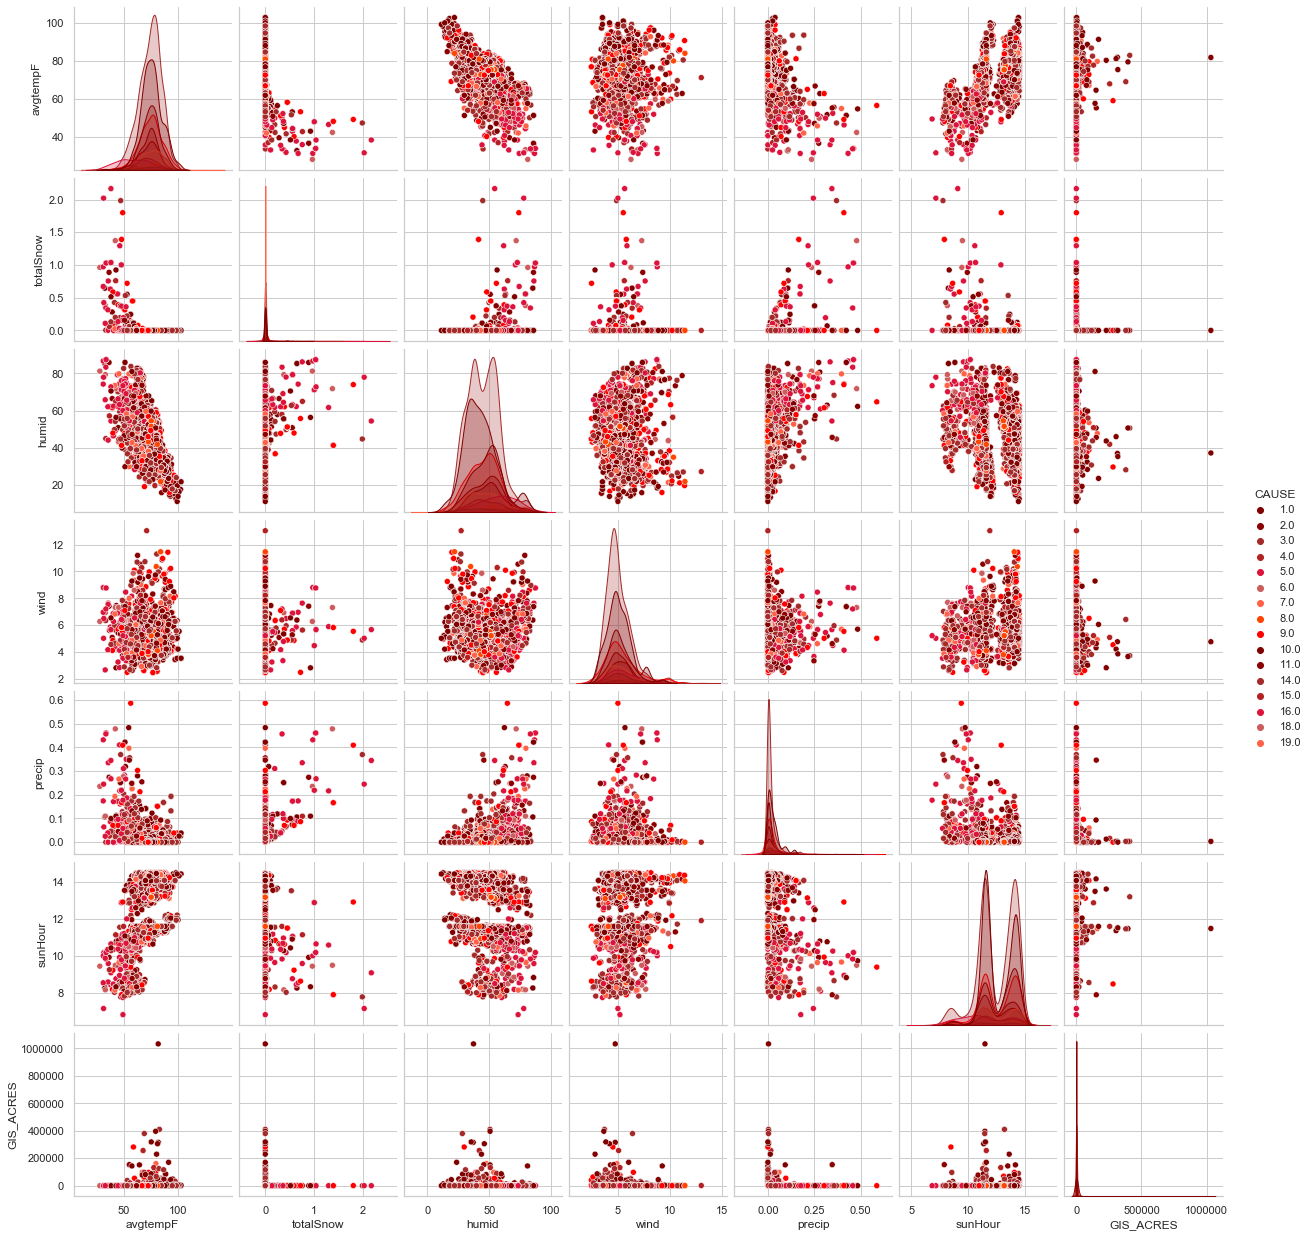

In [18]:
#pairplots of monthly weather and fire data, categorized by the cause of the fire
custom_palette = sns.color_palette(["#800000", "#8B0000", "#A52A2A", "#B22222", "#DC143C", "#CD5C5C", "#FF6347", "#FF4500", "#FF0000"])
# Creating 2 sets of variables (Monthly and Quarterly)
d_features = ['avgtempF', 'totalSnow', 'humid', 'wind', 'precip', 'sunHour', 'CAUSE', 'GIS_ACRES']
q_features = ['q_avgtempF', 'q_avghumid', 'q_sumprecip', 'wind', 'sunHour', 'CAUSE', 'GIS_ACRES']
# Pairplots
print(f" Monthly Data Pairplots ".center(100, '-'))
sns.pairplot(fire_df[d_features], hue="CAUSE", palette=custom_palette, diag_kind='kde', plot_kws={'color': custom_palette[-1]})
plt.show()

------------------------------------- Quarterly Data Pairplots -------------------------------------


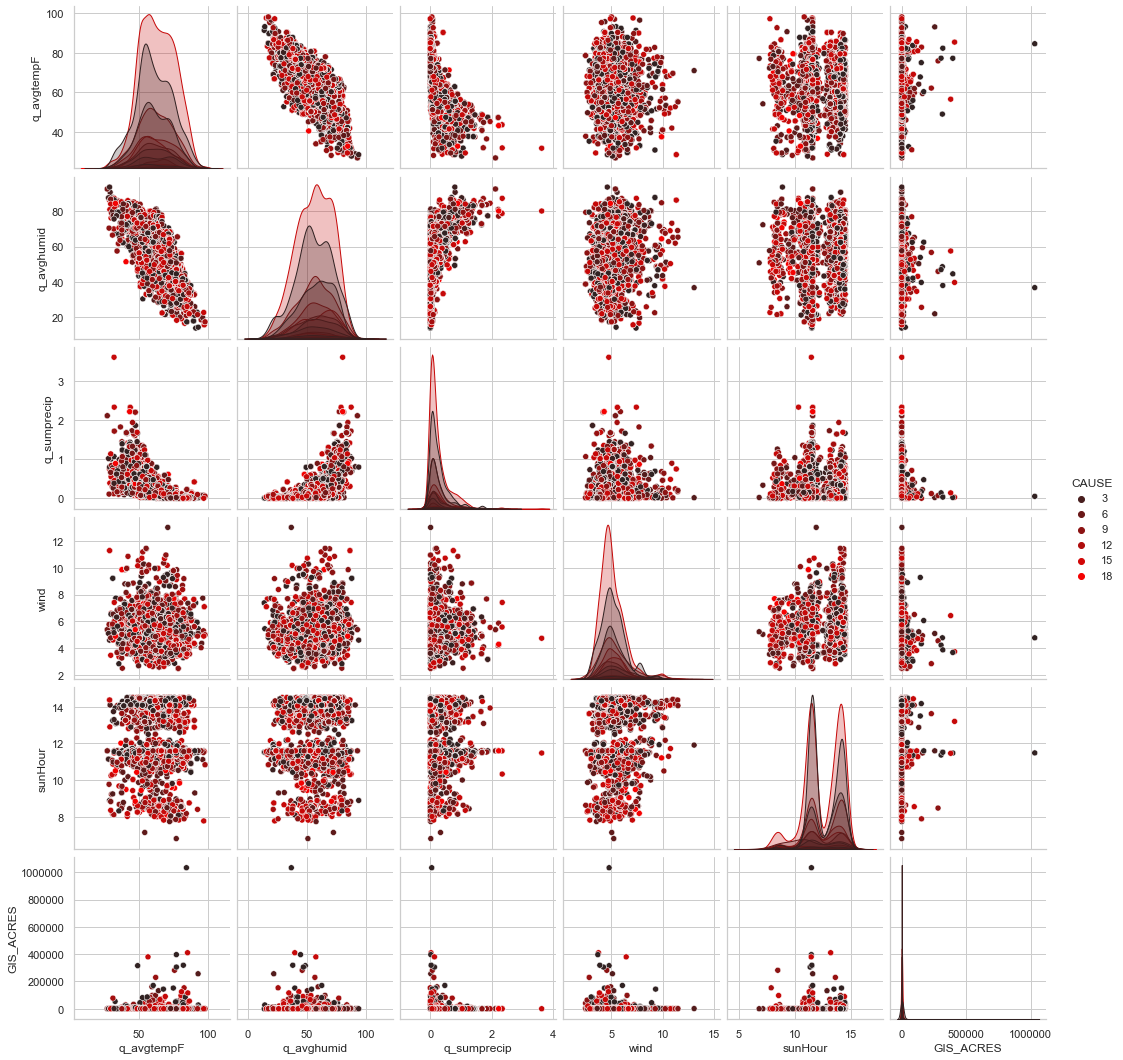

In [19]:
#pairplot of quarterly data for fire incidents
print(f" Quarterly Data Pairplots ".center(100, '-'))
sns.pairplot(fire_df[q_features], hue="CAUSE", palette='dark:red')
plt.show()

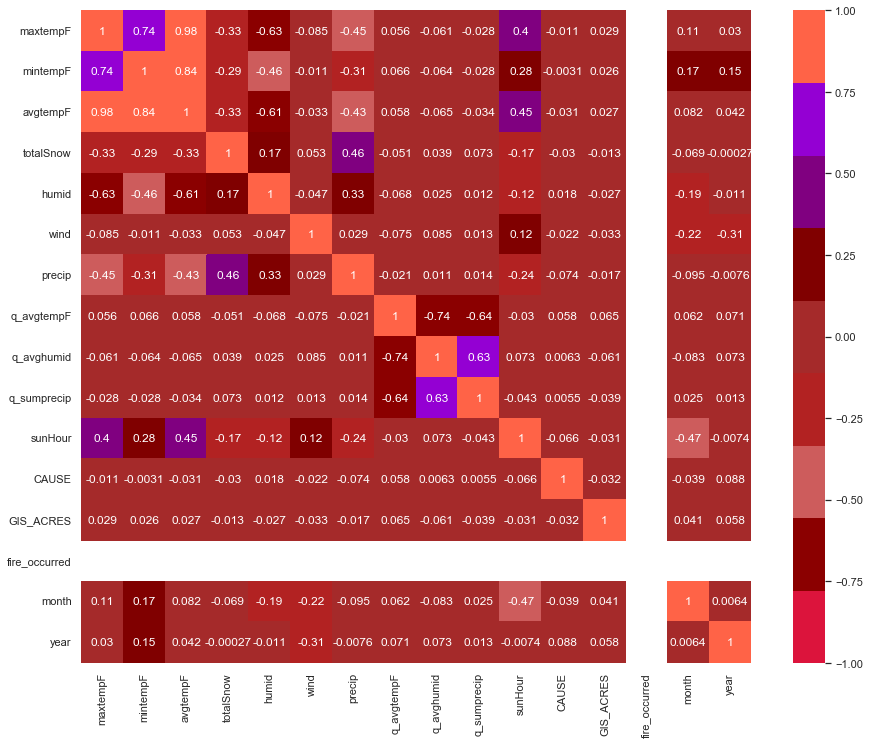

In [20]:
#heatmap visualizing the correlation matrix
custom_palette = sns.color_palette(["#DC143C", "#8B0000", "#CD5C5C", "#B22222", "#A52A2A", "#800000", "#800080", "#9400D3", "#FF6347"])
plt.figure(figsize=(15, 12))
sns.heatmap(fire_df.corr(), vmin=-1, vmax=1, annot=True, cmap=custom_palette)
plt.show()

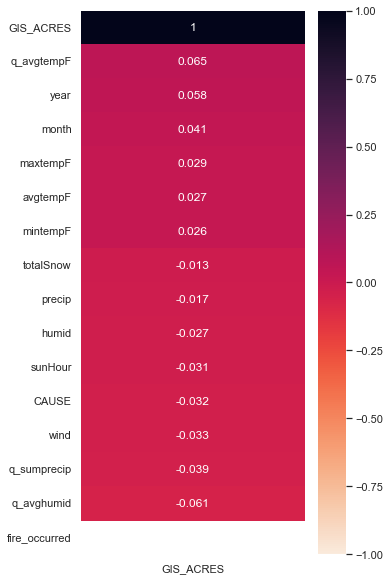

In [21]:
#heatmap showing the correlation coefficients of the GIS_ACRES column with other columns in the fire_df dataset
plt.figure(figsize=(5, 10))
sns.heatmap(fire_df.corr()[['GIS_ACRES']].sort_values(by='GIS_ACRES', ascending=False),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap='rocket_r');

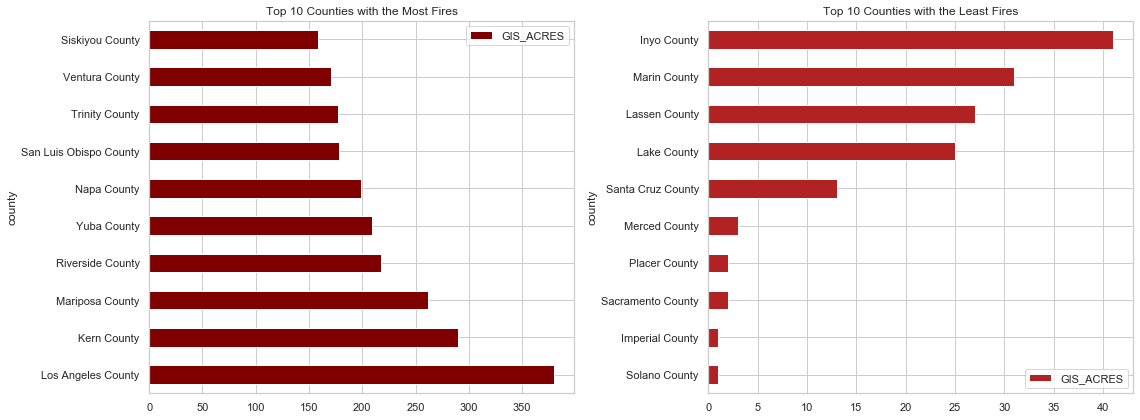

In [22]:
#top 10 counties with the most and least fires based on the count of fires per county
fig, axes = plt.subplots(1, 2, figsize=(16, 6), tight_layout=True)

(fire_df[['county','GIS_ACRES']]
 .groupby('county')
 .count()
 .sort_values(by='GIS_ACRES', ascending=False)
 .head(10)
 .plot(kind='barh', title='Top 10 Counties with the Most Fires', color='maroon', ax=axes[0]))

(fire_df[['county','GIS_ACRES']]
 .groupby('county')
 .count()
 .sort_values(by='GIS_ACRES')
 .head(10)
 .plot(kind='barh', title='Top 10 Counties with the Least Fires', color='firebrick', ax=axes[1]))

plt.show()

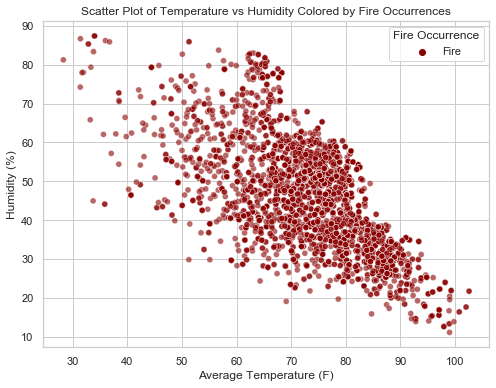

In [23]:
#relationship between average temperature and humidity
fire_df['fire_occurred'] = fire_df['GIS_ACRES'].apply(lambda x: 'Fire' if x != 'no_fire' else 'No Fire')
plt.figure(figsize=(8, 6))
sns.scatterplot(data=fire_df, x='avgtempF', y='humid', hue='fire_occurred', style='fire_occurred', alpha=0.6, palette={'Fire':'darkred', 'No Fire':'darkblue'})
plt.title('Scatter Plot of Temperature vs Humidity Colored by Fire Occurrences')
plt.xlabel('Average Temperature (F)')
plt.ylabel('Humidity (%)')
plt.legend(title='Fire Occurrence')
plt.grid(True)
plt.show()

## Classification

In [24]:
# Data splitting for classification
X = fire_data_encoded.drop(columns=['GIS_ACRES', 'date', 'q_avgtempF', 'q_avghumid', 'q_sumprecip', 'maxtempF', 'mintempF', 'CAUSE', 'fire_occurred', 'county'])
y = fire_data_encoded['fire_occurred']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [26]:
df['fire_occurred'].value_counts(normalize=True)

0    0.638424
1    0.361576
Name: fire_occurred, dtype: float64

In [27]:
# Logestic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
print("Train Score:",log_reg.score(X_train, y_train))
print("Test Score:",log_reg.score(X_test, y_test))

Train Score: 0.7536081133792745
Test Score: 0.7673642705489839


In [28]:
pd.set_option('display.max_row', None)

In [29]:
coef_df = pd.DataFrame(log_reg.coef_, columns=X.columns)
coef_df.T.sort_values(by=0, ascending=False).head(77)

,0
month_8,1.084640
month_9,0.670654
sunHour,0.511623
month_11,0.405338
month_7,0.362205
month_12,0.203057
totalSnow,0.023210
year,-0.001704
avgtempF,-0.006271
humid,-0.024730


In [30]:
log_reg.coef_

array([[-0.0062715 ,  0.02320966, -0.02473003, -0.28164321, -0.18934738,
         0.51162338, -0.00170439, -0.47084114, -0.61965767, -0.47976228,
        -0.42696924, -0.47604488, -0.22104584,  0.36220508,  1.0846398 ,
         0.67065409, -0.03954432,  0.40533759,  0.2030574 ]])

In [31]:
# Feature Scaling
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [32]:
# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train_sc, y_train)
print("Train Score:",knn.score(X_train_sc, y_train))
print("Test Score:",knn.score(X_test_sc, y_test))

Train Score: 0.9986997789624236
Test Score: 0.8495602062481044


In [33]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=150, max_depth=15)
rf.fit(X_train, y_train)
print("Train Score:",rf.score(X_train, y_train))
print("Test Score:",rf.score(X_test, y_test))

Train Score: 0.9838772591340528
Test Score: 0.8771610555050046


In [34]:
rf_preds = rf.predict(X_test)

In [35]:
rf.feature_importances_

array([0.19931686, 0.01559833, 0.19129028, 0.13388703, 0.09885488,
       0.21714342, 0.06835189, 0.00212781, 0.00244821, 0.0023726 ,
       0.00580018, 0.00728338, 0.00647731, 0.01880385, 0.009487  ,
       0.00910122, 0.00641197, 0.0032967 , 0.00194708])

In [36]:
feature_df = pd.DataFrame(rf.feature_importances_, index=X.columns)
feature_df.sort_values(by=0, ascending=False)

,0
sunHour,0.217143
avgtempF,0.199317
humid,0.191290
wind,0.133887
precip,0.098855
year,0.068352
month_7,0.018804
totalSnow,0.015598
month_8,0.009487
month_9,0.009101


In [37]:
log_reg.predict(X_test)
knn.predict(X_test)
rf.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [38]:
pred_df = pd.DataFrame(columns=['log_reg', 'knn', 'rf'])
pred_df['log_reg'] = log_reg.predict(X_test)
pred_df['knn'] = knn.predict(X_test)
pred_df['rf'] = rf.predict(X_test)
pred_df['ensemble'] = (pred_df.sum(axis=1)/3).round(0)

In [39]:
metrics.accuracy_score(pred_df['ensemble'], y_test)

0.800121322414316

In [40]:
knn_pipe = Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3, weights='distance')),
])
vote = VotingClassifier([
    ('knn_pipe', knn_pipe),
    ('rf', RandomForestClassifier(n_estimators=150, max_depth=15)),
    ('ada', AdaBoostClassifier(n_estimators=150))
])
vote.fit(X_train, y_train)

VotingClassifier(estimators=[('knn_pipe',
                              Pipeline(memory=None,
                                       steps=[('sc',
                                               StandardScaler(copy=True,
                                                              with_mean=True,
                                                              with_std=True)),
                                              ('knn',
                                               KNeighborsClassifier(algorithm='auto',
                                                                    leaf_size=30,
                                                                    metric='minkowski',
                                                                    metric_params=None,
                                                                    n_jobs=None,
                                                                    n_neighbors=3,
                                                             

In [41]:
print(f"Train Score:\t{vote.score(X_train, y_train):.4f}")
print(f"Test Score:\t{vote.score(X_test, y_test):.4f}")

Train Score:	0.9837
Test Score:	0.8735


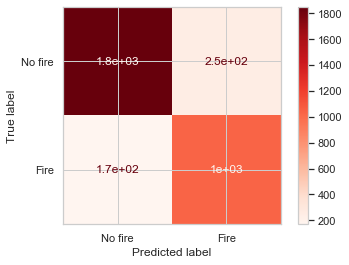

In [42]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, vote.predict(X_test)).ravel()
metrics.plot_confusion_matrix(vote, X_test, y_test, cmap='Reds', display_labels=['No fire', 'Fire'])

In [43]:
vote_preds = vote.predict(X_test)

In [44]:
metrics.roc_auc_score(y_test, rf_preds)
print(metrics.recall_score(y_test, rf_preds))
print(metrics.precision_score(y_test, rf_preds))

0.8323603002502085
0.8302828618968386


In [45]:
metrics.roc_auc_score(y_test, vote_preds)
print(metrics.recall_score(y_test, vote_preds))
print(metrics.precision_score(y_test, vote_preds))

0.8590492076730609
0.8059467918622848


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Training the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
# Predictions
dt_preds = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, dt_preds)
print("Accuracy:", accuracy)

Accuracy: 0.8301486199575372


In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
# Assuming binary classification, obtain probabilities for the positive class
dt_probs = dt_model.predict_proba(X_test)[:, 1]
# Calculate precision
precision = precision_score(y_test, dt_preds)
print("Precision:", precision)
# Calculate recall
recall = recall_score(y_test, dt_preds)
print("Recall:", recall)
# Calculate F1 score
f1 = f1_score(y_test, dt_preds)
print("F1 Score:", f1)
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, dt_probs)
print("ROC AUC:", roc_auc)

Precision: 0.7368421052631579
Recall: 0.8290241868223519
F1 Score: 0.7802197802197801
ROC AUC: 0.8298417174782609


In [48]:
from sklearn.ensemble import RandomForestClassifier
# Training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Predictions
rf_preds = rf_model.predict(X_test)

In [49]:
# Calculate metrics for Random Forest
rf_probs = rf_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC AUC
accuracy_rf = accuracy_score(y_test, rf_preds)
precision_rf = precision_score(y_test, rf_preds)
recall_rf = recall_score(y_test, rf_preds)
f1_rf = f1_score(y_test, rf_preds)
roc_auc_rf = roc_auc_score(y_test, rf_probs)
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print(f"ROC AUC: {roc_auc_rf}")


Random Forest Metrics:
Accuracy: 0.8892932969366091
Precision: 0.8632404181184669
Recall: 0.8265221017514596
F1 Score: 0.8444823178525777
ROC AUC: 0.9395921768299129


In [50]:
from sklearn.linear_model import LogisticRegression
# Training the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
# Predictions
logreg_preds = logreg_model.predict(X_test)

In [51]:
# Calculate metrics for Logistic Regression
logreg_probs = logreg_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC AUC
accuracy_logreg = accuracy_score(y_test, logreg_preds)
precision_logreg = precision_score(y_test, logreg_preds)
recall_logreg = recall_score(y_test, logreg_preds)
f1_logreg = f1_score(y_test, logreg_preds)
roc_auc_logreg = roc_auc_score(y_test, logreg_probs)
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_logreg}")
print(f"Precision: {precision_logreg}")
print(f"Recall: {recall_logreg}")
print(f"F1 Score: {f1_logreg}")
print(f"ROC AUC: {roc_auc_logreg}")

Logistic Regression Metrics:
Accuracy: 0.7673642705489839
Precision: 0.6750405186385737
Recall: 0.6947456213511259
F1 Score: 0.6847513357994246
ROC AUC: 0.8322497855298864


In [52]:
from sklearn.neighbors import KNeighborsClassifier
# Training the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
# Predictions
knn_preds = knn_model.predict(X_test)

In [53]:
# Calculate metrics for KNN
knn_probs = knn_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC AUC
accuracy_knn = accuracy_score(y_test, knn_preds)
precision_knn = precision_score(y_test, knn_preds)
recall_knn = recall_score(y_test, knn_preds)
f1_knn = f1_score(y_test, knn_preds)
roc_auc_knn = roc_auc_score(y_test, knn_probs)
print("KNN Metrics:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")
print(f"ROC AUC: {roc_auc_knn}")

KNN Metrics:
Accuracy: 0.8004246284501062
Precision: 0.7148530579825259
Recall: 0.7506255212677231
F1 Score: 0.7323026851098454
ROC AUC: 0.8638556041696647


In [54]:
model_metrics = {
    "Model": ["Decision Tree", "Random Forest", "Logistic Regression", "KNN"],
    "Accuracy": [accuracy, accuracy_rf, accuracy_logreg, accuracy_knn],  # Replace with actual variables
    "Precision": [precision, precision_rf, precision_logreg, precision_knn],
    "Recall": [recall, recall_rf, recall_logreg, recall_knn],
    "F1 Score": [f1, f1_rf, f1_logreg, f1_knn],
    "ROC AUC": [roc_auc, roc_auc_rf, roc_auc_logreg, roc_auc_knn]
}
# Create a DataFrame
metrics_df = pd.DataFrame(model_metrics)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Decision Tree,0.830149,0.736842,0.829024,0.780220,0.829842
1,Random Forest,0.889293,0.863240,0.826522,0.844482,0.939592
2,Logistic Regression,0.767364,0.675041,0.694746,0.684751,0.832250
3,KNN,0.800425,0.714853,0.750626,0.732303,0.863856


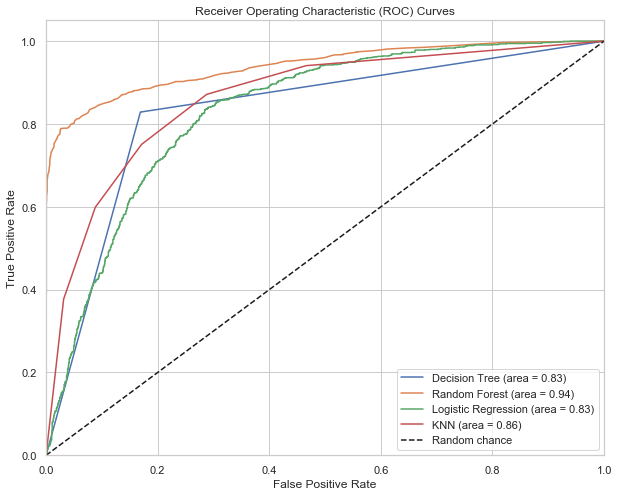

In [55]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
# Compute ROC curve and AUC for each model
models = [
    ('Decision Tree', dt_model, dt_preds),
    ('Random Forest', rf_model, rf_preds),
    ('Logistic Regression', logreg_model, logreg_preds),
    ('KNN', knn_model, knn_preds),
]
plt.figure(figsize=(10, 8))
for name, model, preds in models:
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

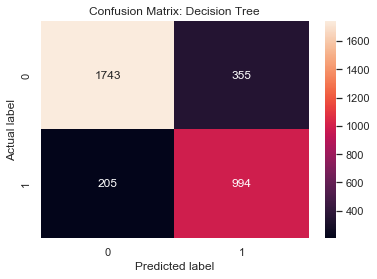

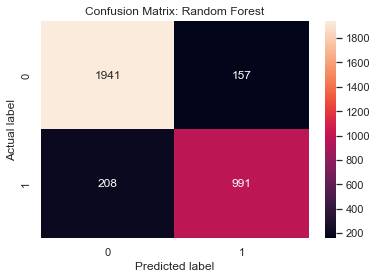

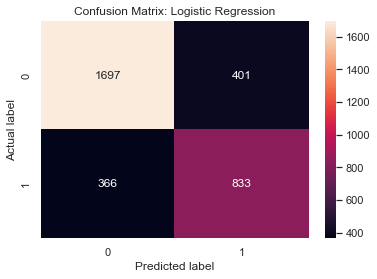

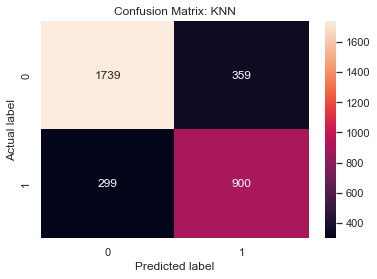

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute and plot confusion matrix for each model
for name, _, preds in models:
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f'Confusion Matrix: {name}')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()


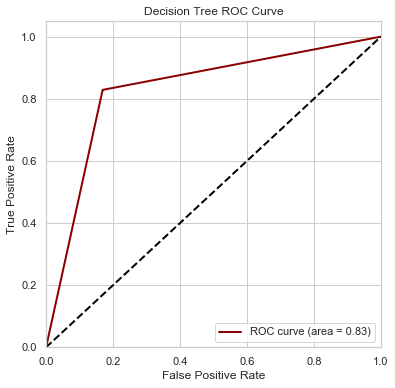

In [57]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Decision Tree ROC Curve
dt_probs = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, dt_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkred', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.show()

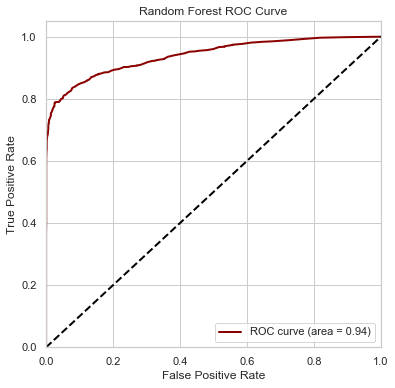

In [58]:
# Random Forest ROC Curve
rf_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkred', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()

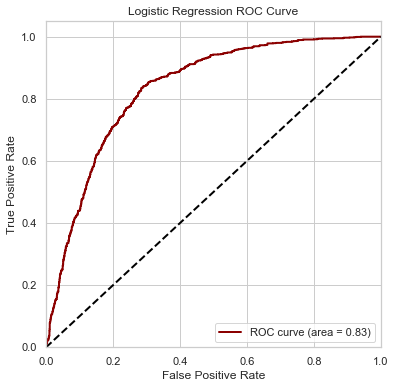

In [59]:
# Logistic Regression ROC Curve
logreg_probs = logreg_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, logreg_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkred', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

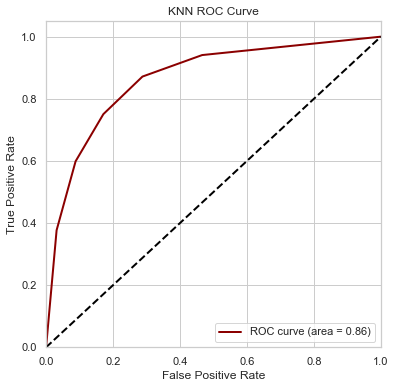

In [60]:
# KNN ROC Curve
knn_probs = knn_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, knn_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkred', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.show()